In [1]:
import matplotlib.pyplot as plt

from config import config
from license_plate_image_augmentor import LicensePlateImageAugmentor
from pyimagesearch.io import Hdf5DatasetLoader

In [13]:
BATCH_SIZE = 32

In [14]:
loader = Hdf5DatasetLoader()
background_images = loader.load(config.SUN397_HDF5, shuffle=True, max_items=10000)
images, labels = loader.load(config.TRAIN_HDF5, shuffle=True, max_items=BATCH_SIZE)

augmentor = LicensePlateImageAugmentor(config.IMAGE_WIDTH, config.IMAGE_HEIGHT, background_images)

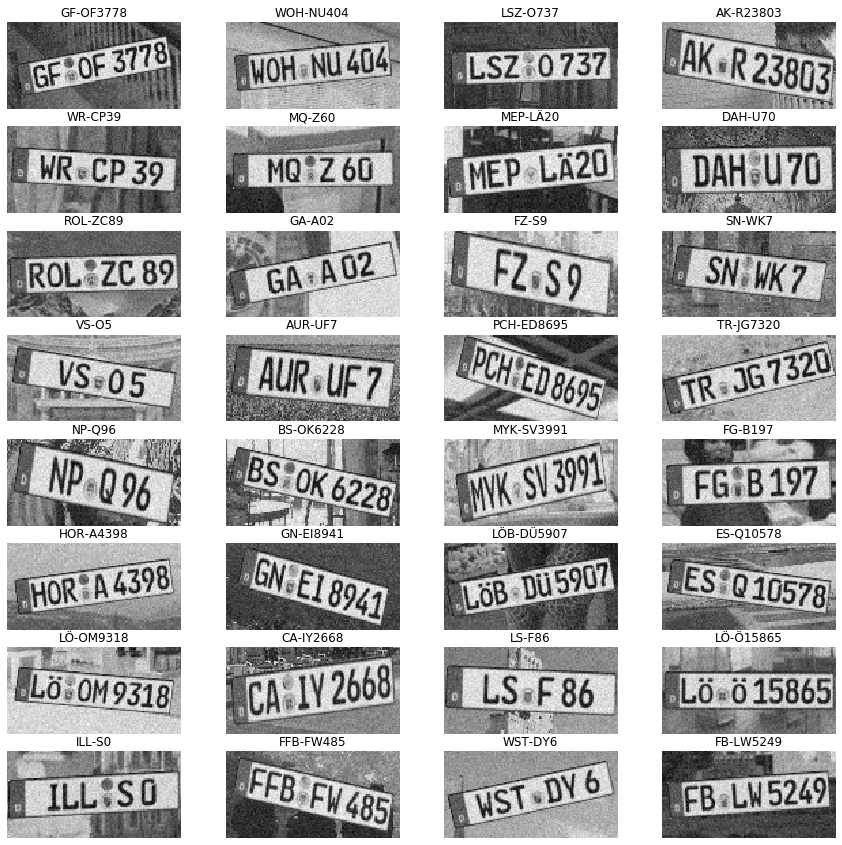

In [21]:
cols = 4
rows = len(images) // cols

image_index = 0
fig, axarr = plt.subplots(rows, cols, figsize=(15, 15))
for r in range(rows):
    for c in range(cols):
        image = images[image_index]
        image = augmentor.generate_plate_image(image)
        axarr[r, c].axis("off")
        axarr[r, c].title.set_text(labels[image_index])
        axarr[r, c].imshow(image, cmap='gray')
        image_index += 1

plt.show()